In [7]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [8]:
data = pd.read_csv("C:/Users/Furka/Desktop/Machine Learning Project/water_dataX.csv")

In [9]:
df = pd.DataFrame(data)
df = df.iloc[0:1900, :]
df.shape
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,NAN,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,27,7.4,7,88.5,0.977,0.186,27,105,2005
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,6.6,7.81,603.2,2.675,0.263,40,191,2005
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28,6.6,7.49,571.5,2.091,0.256,151,273,2005
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,5.4,7.16,75.8,2.092,NAN,404,513,2005


In [10]:
df.dtypes


STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (�mhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [11]:
df = df.rename(columns={"D.O. (mg/l)": "D.O.", "CONDUCTIVITY (�mhos/cm)": "Conductivity", "B.O.D. (mg/l)": "B.O.D",
 "NITRATENAN N+ NITRITENANN (mg/l)": "NI", "FECAL COLIFORM (MPN/100ml)": "Fec_Coliform", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_Coliform"})

In [12]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


Converting object data type to numeric 

#Start from index 3

In [13]:
def convert_to_numeric(df):
    num_col = df.shape[1]
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

STATION CODE     object
LOCATIONS        object
STATE            object
Temp            float64
D.O.            float64
PH              float64
Conductivity    float64
B.O.D           float64
NI              float64
Fec_Coliform    float64
Tot_Coliform    float64
year              int64
dtype: object

#Replacing string NAN values with actual NAN value (np.nan)

In [14]:
def convert_to_nan(df):
    n_col = df.shape[1]
    for index in range(n_col):
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [15]:
# Checking for missing values
df.isnull().sum().sort_values()

year              0
PH                7
Conductivity     24
D.O.             30
B.O.D            42
Temp             89
STATION CODE    120
Tot_Coliform    130
LOCATIONS       183
NI              189
Fec_Coliform    280
STATE           670
dtype: int64

#Replacing NULL values with median of column

#Selecting numeric data

In [16]:
df_num = df.select_dtypes(exclude="object")
df_num_col = df_num.columns
imputer = SimpleImputer(strategy="median")

df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [17]:
df_num

,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year
0,30.6,6.7,7.50,203.0,1.8965,0.100,11.0,27.0,2014.0
1,29.8,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0,2014.0
2,29.5,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0,2014.0
3,29.7,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0,2014.0
4,29.5,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...
1895,27.0,7.4,7.00,88.5,0.9770,0.186,27.0,105.0,2005.0
1896,27.0,6.6,7.81,603.2,2.6750,0.263,40.0,191.0,2005.0
1897,28.0,6.6,7.49,571.5,2.0910,0.256,151.0,273.0,2005.0
1898,28.0,5.4,7.16,75.8,2.0920,0.520,404.0,513.0,2005.0


#Filling Categorical missing values

In [18]:
df_cat = df.select_dtypes(include="object")
df_cat.isnull().sum()

STATION CODE    120
LOCATIONS       183
STATE           670
dtype: int64

#Filling Missing Values in 'STATE' Based on 'STATION CODE'

#Observing specific conditions and filling NaN values in the 'STATE' column

#Example: Filling NaN values in 'STATE' where 'STATION CODE' is '1330' based on observation

In [19]:
# Creating a Copy of the DataFrame
pd.set_option('mode.chained_assignment', None)
df_cat_copy = df_cat.copy()

# Filtering Rows where 'STATION CODE' is '1330'
selected_rows = df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

# Filling NaN occurrences in 'STATE' with the observed value 'TAMILNADU'
df_cat_copy["STATE"][df_cat_copy["STATION CODE"] == "1330"] = selected_rows["STATE"].fillna("TAMILNADU")

# Displaying the modified rows
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [20]:
location_null = df_cat[df_cat["LOCATIONS"].isnull()]
location_null_indices = location_null.index
location_null

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1217,1150,NaN,"DAMANGANGA AT KACHIGAON U\S AT GIDC WIER,GUJARAT"
1218,1246,NaN,"DAMANGANGA AT KACHIGAON D\S (DAMAN),GUJARAT"
1219,2459,NaN,"DAMANGANGA AT ZARI CAUSE WAY BRIDGE,DAMAN"
...,...,...,...
1393,1404,NaN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA"
1394,1726,NaN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA"
1395,1631,NaN,MYNTDU JAINTIA HILLS MEGHALAYA
1396,1633,NaN,"SIMSANG, WILLIAMNAGAR, MEGHALAYA"


In [21]:
def fill_locations(df_cat):
    location_null = df_cat[df_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    df_cat[df_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]


,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [22]:
df_cat_copy[df_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


#Now I can fill NULL values of Station code with corresponding LOCATION value(ex - above dataframe)

#I will match the corresponding LOCATION value with other same LOCATION value and insert the value of station code

In [23]:
def fill_code(df_cat):
    station_null = df_cat[df_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = df_cat["STATION CODE"][df_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    df_cat[df_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(df_cat_copy)
df_cat_copy[df_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


#Filling all state NAN values which have corresponding station code value

In [24]:
def fill_state(df_cat):
    station_code = df_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] 
            state_values = df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            df_cat["STATE"][df_cat["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(df_cat_copy)
df_cat_copy[df_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [25]:
df_cat_copy.isnull().sum()

STATION CODE     4
LOCATIONS        2
STATE           12
dtype: int64

In [26]:
df_cat_copy[df_cat_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [27]:
# The first location KABBANI AT MUTHANKARA is in STATE Kerela
df_cat_copy["STATE"][1106] = "KERALA"
df_cat_copy["STATE"][1107] = "KERALA"
df_cat_copy["STATE"][1650] = "CHANDIGARH"
df_cat_copy["STATE"][1651] = "CHANDIGARH"
df_cat_copy["STATE"][1652] = "CHANDIGARH"
df_cat_copy["STATE"][1770] = "CHANDIGARH"
df_cat_copy["STATE"][1771] = "CHANDIGARH"
df_cat_copy["STATE"][1772] = "CHANDIGARH"
df_cat_copy["STATE"][1784] = "DAMAN & DIU"
df_cat_copy["STATE"][1785] = "DAMAN & DIU"
df_cat_copy["STATION CODE"][1784] = "0000" # I am setting this according to myself
df_cat_copy["STATION CODE"][1785] = "0000"

In [28]:
df_cat = df_cat_copy
df_cat.isnull().sum()

STATION CODE    2
LOCATIONS       2
STATE           2
dtype: int64

In [29]:
df_num.isnull().sum()

Temp            0
D.O.            0
PH              0
Conductivity    0
B.O.D           0
NI              0
Fec_Coliform    0
Tot_Coliform    0
year            0
dtype: int64

In [30]:
df_final = pd.concat([df_cat, df_num], axis=1)
df_final.isnull().sum()

STATION CODE    2
LOCATIONS       2
STATE           2
Temp            0
D.O.            0
PH              0
Conductivity    0
B.O.D           0
NI              0
Fec_Coliform    0
Tot_Coliform    0
year            0
dtype: int64

#These are the samples which don't contain any attribute

#The filled attributes are median of corresponding columns

#So it is best to remove them

In [31]:
df_null = df_final[(df_final["STATION CODE"].isnull()) & (df_final["LOCATIONS"].isnull()) & (df_final["STATE"].isnull())]
df_null_indices = df_null.index
df_final.drop(df_null_indices, axis=0, inplace=True)
df_null

,STATION CODE,LOCATIONS,STATE,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year
260,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.8965,0.52,233.0,465.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.8965,0.52,233.0,465.0,2013.0


In [32]:
df_final.isnull().sum()

STATION CODE    0
LOCATIONS       0
STATE           0
Temp            0
D.O.            0
PH              0
Conductivity    0
B.O.D           0
NI              0
Fec_Coliform    0
Tot_Coliform    0
year            0
dtype: int64

In [33]:
df_final.shape

(1898, 12)

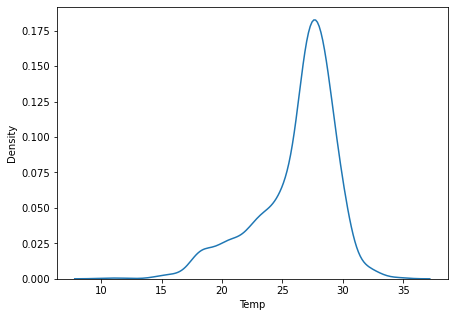

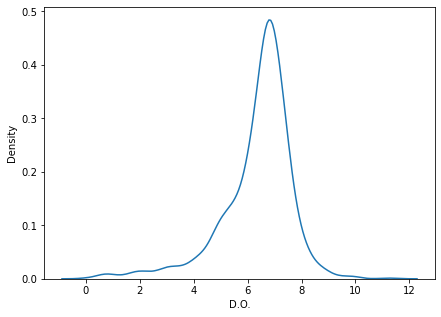

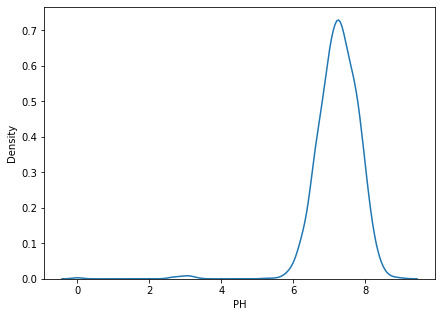

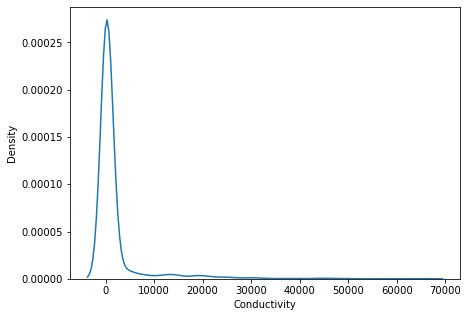

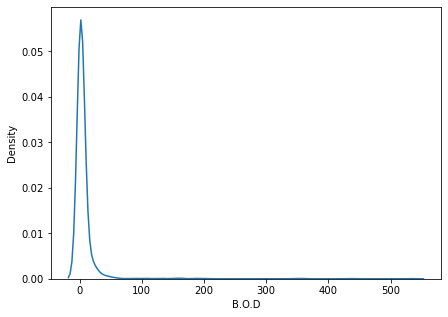

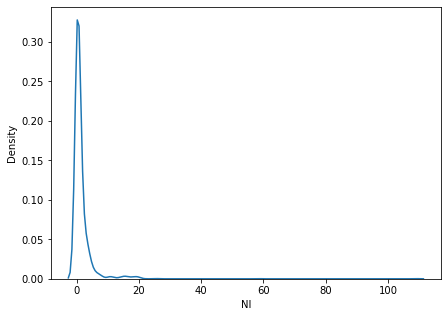

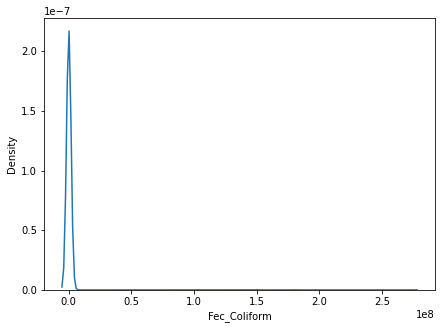

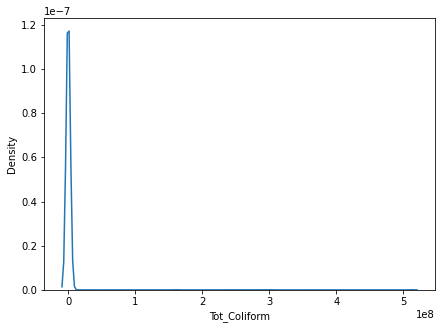

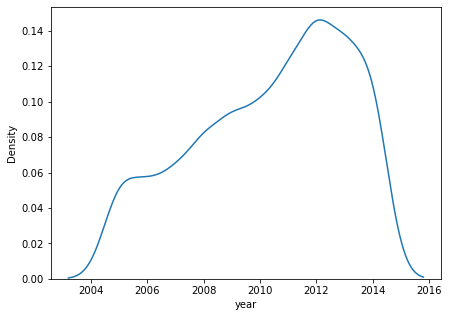

In [34]:
df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

#Here, almost all kde plots are Gaussian Like 

#Using Z-Score Normalization to detect outliers

In [35]:
df_num_final_norm = zscore(df_num_final, axis=0)
a = pd.DataFrame(df_num_final_norm)
type(a)

pandas.core.frame.DataFrame

In [36]:
df_num_final_norm = zscore(df_num_final, axis=0)


def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[: ,index]
        greater_than_3 = df_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(a)
print("Number of outliers using Z-Score method-",len(indices_arr))
df_final.iloc[indices_arr, :]

Number of outliers using Z-Score method- 125


,STATION CODE,LOCATIONS,STATE,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year
739,2859,"SINGDA DAM AT NAMBUL, IMPHAL WEST",MANIPUR,28.0,11.1,7.6,131.0,3.6,0.52,233.0,32.0,2012.0
743,2853,"MAPITHEL DAM ON THOUBAL, THOUBAL",MANIPUR,28.0,11.4,7.2,128.0,1.0,0.52,233.0,20.0,2012.0
37,2671,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,25.3,5.3,7.7,24062.0,9.9,1.20,156.0,304.0,2014.0
88,2294,R KALLAI AT KALLAI BRIDGE,KERALA,26.3,3.7,7.7,32005.0,1.2,0.90,40000.0,60392.0,2014.0
108,2304,R MOGRAL AT MOGRAL BR.,KERALA,30.0,5.6,7.2,24360.0,2.1,0.30,92.0,447.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
430,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,26.8,3.4,7.8,2577.0,164.9,1.50,148825783.0,160405392.0,2013.0
683,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT",TAMILNADU,32.0,0.2,7.2,2219.0,185.8,1.75,180000000.0,300000000.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.90,272521616.0,511090873.0,2014.0
430,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,26.8,3.4,7.8,2577.0,164.9,1.50,148825783.0,160405392.0,2013.0


In [37]:
df_final.iloc[749]

STATION CODE                                         3383
LOCATIONS       BUGI RIVER AT MIBANPARA, SOUTH GARO HILLS
STATE                                           MEGHALAYA
Temp                                                 25.0
D.O.                                                  7.7
PH                                                    7.2
Conductivity                                         95.0
B.O.D                                                 1.8
NI                                                   2.67
Fec_Coliform                                         22.0
Tot_Coliform                                         50.0
year                                               2012.0
Name: 751, dtype: object

In [38]:
indices_arr

[737,
 741,
 37,
 88,
 108,
 111,
 133,
 151,
 155,
 156,
 157,
 250,
 345,
 365,
 386,
 390,
 408,
 546,
 548,
 597,
 638,
 660,
 667,
 798,
 799,
 809,
 811,
 841,
 843,
 889,
 905,
 925,
 951,
 1028,
 1029,
 1037,
 1067,
 1147,
 1216,
 1218,
 1219,
 1235,
 1239,
 1250,
 1260,
 1303,
 1313,
 1315,
 1329,
 1410,
 1557,
 1564,
 1570,
 1614,
 1677,
 1729,
 1802,
 1835,
 1864,
 172,
 252,
 429,
 681,
 702,
 798,
 799,
 974,
 1183,
 1218,
 1369,
 1518,
 1565,
 1685,
 1766,
 1769,
 1770,
 1783,
 1803,
 1886,
 225,
 227,
 228,
 232,
 486,
 487,
 488,
 489,
 493,
 691,
 776,
 778,
 956,
 958,
 959,
 961,
 962,
 964,
 1027,
 1028,
 1029,
 1173,
 1175,
 1217,
 1218,
 1224,
 1339,
 1340,
 1341,
 1522,
 1523,
 1535,
 1634,
 1635,
 1647,
 1761,
 1762,
 1763,
 1806,
 1881,
 172,
 429,
 681,
 172,
 429,
 681]

In [39]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(1785, 12)

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 0 to 1899
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  1785 non-null   object 
 1   LOCATIONS     1785 non-null   object 
 2   STATE         1785 non-null   object 
 3   Temp          1785 non-null   float64
 4   D.O.          1785 non-null   float64
 5   PH            1785 non-null   float64
 6   Conductivity  1785 non-null   float64
 7   B.O.D         1785 non-null   float64
 8   NI            1785 non-null   float64
 9   Fec_Coliform  1785 non-null   float64
 10  Tot_Coliform  1785 non-null   float64
 11  year          1785 non-null   float64
dtypes: float64(9), object(3)
memory usage: 181.3+ KB


In [44]:
df_num_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 1899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          1898 non-null   float64
 1   D.O.          1898 non-null   float64
 2   PH            1898 non-null   float64
 3   Conductivity  1898 non-null   float64
 4   B.O.D         1898 non-null   float64
 5   NI            1898 non-null   float64
 6   Fec_Coliform  1898 non-null   float64
 7   Tot_Coliform  1898 non-null   float64
 8   year          1898 non-null   float64
dtypes: float64(9)
memory usage: 212.8 KB


In [47]:
df_final.to_csv("final_water_dataX.csv",index = False)
df_num_final.to_csv("num_final_water_dataX.csv",index = False)